In [ ]:

# import roofline as rl
# color choices["darkviolet","darkmagenta","indigo","maroon","darkblue","navy","darkgreen","darkslategrey", "teal","olive", "saddlebrown","black"]

In [ ]:
!pip install matplotlib-label-lines

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib import rc
from labellines import labelLine, labelLines
import numpy as np
import pandas as pd
import matplotlib.patches as patches
csv_file_path = "TimingData.csv"
df = pd.read_csv(csv_file_path, encoding='unicode_escape')
df = df.loc[(df["NX"]!=256)]
df.to_csv('TimingData1.csv', index=False)



In [ ]:
csv_file_path = "TimingData.csv"
df = pd.read_csv(csv_file_path, encoding='unicode_escape')
df = df.loc[(df["NX"]!=256)]
df.to_csv('TimingData1.csv', index=False)

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib import rc
from labellines import labelLine, labelLines
import numpy as np
import pandas as pd
import matplotlib.patches as patches





darkgreen = (0.1,0.3,0.1,0.99)
# violet = # (0.2,0,0.3,0.99)



#rc('font',**{'family':'serif','serif':['Calibri']})
rc('text', usetex=False)
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Calibri']
plt.rcParams['figure.figsize'] = [16, 9]



xmax = 8
ymax = 64
xmin = 1/512
ymin = 1/64
x_ticks = [ 1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4, 8]
x_ticksL = [ "1/128","1/64", "1/32", "1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8"]
y_ticks = [1/16, 1/8, 1/4, 1/2, 1, 2, 4, 8, 16, 32]
y_ticksL = ["1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", "16", "32"]

# avx2 double, int
floats_per_vec = 4
ints_per_vec = 8


def get_data(ds, bc, L1, L2, L3, datafile):
    #csv_file_path = "TimingData.csv"
    csv_file_path = datafile
    df = pd.read_csv(csv_file_path, encoding='unicode_escape')
    df = df.loc[(df["function"]==bc)]
    df = df.loc[(df['DIRECTION_SIZE'] == ds)]
    nx = df["NX"].values
    iops = df["iops"].values
    flops = df["flops"].values
    ts = df["TIMESTEPS"].values
    cycles = df["cycles"].values

    bread = df["bytes_read"].values
    bwrite = df["bytes_write"].values

    bytes = bread + bwrite
    fOI = flops/bytes
    iOI = iops/bytes
    fOIr = flops/bread
    iOIr = iops/bread
    fOIw = flops/bwrite
    iOIw = iops/bwrite
    fP = ts*flops/cycles
    iP = ts*iops/cycles

    colors = np.where(bytes<L3, "chocolate", "orangered")
    colors = np.where(bytes<L2, "darkorange", colors)
    colors = np.where(bytes<L1, "orange", colors)

    return fOI,iOI,fOIr,iOIr,fOIw,iOIw,fP,iP,nx,colors



# def get_colors


    # Peak CPU performance (ops/cycle)
    # Peak CPU performance Vectorized (ops/cycle)
    # Performance: Flops/cycle = flops/byte * bytes/cycles corresponding to the given intensities
    # Operational intensities (flops/byte)

def roofline(
                peak_performance_flops,
                peak_performance_flops_fma,
                peak_performance_iops,
                L1_bw,
                L2_bw,
                L3_bw,
                mem_bw,
                fq,
                L1_s,
                L2_s,
                L3_s,
                dType,
                fnames,
                op_types,
                byte_types,
                savefile,
                mycols,
                datafile,
                zen=False
                ):
    ax  = plt.gca()
    fig = plt.gcf()




    plt.loglog()
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xticks(x_ticks, x_ticksL)
    plt.yticks(y_ticks, y_ticksL)
    plt.minorticks_off()
    plt.grid(True)

    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=28)

    plt.xlabel('Operational Intensity [iops/byte]', loc='center', fontdict={'fontsize': 18, 'fontname': 'Helvetica', 'family': 'sans-serif'})
    plt.ylabel('Performance [iops/cycle]', rotation=0, fontdict={'fontsize': 18, 'fontname': 'Helvetica', 'family': 'sans-serif'})
    ax.yaxis.set_label_coords(0.15, 1.0)
    #ax.xaxis.set_label_coords(0.8, -0.1)
    plt.title('Roofline Plot', fontdict={'fontsize':28, 'fontname': 'Helvetica', 'family': 'sans-serif'}, fontweight = 'bold') #, x=0.85, y=0.9)






    intensity = np.logspace(-5, 1, num=1000)

    peak_performance_flops_v = peak_performance_flops*floats_per_vec
    peak_performance_flops_v = peak_performance_flops*floats_per_vec
    peak_performance_flops_fma_v = peak_performance_flops_fma*floats_per_vec
    peak_performance_iops_v = peak_performance_iops*ints_per_vec



    # intel  amd slightly built different
    bw_performance_l1_read =  intensity * L1_bw[0]
    bw_performance_l1_write =  intensity * L1_bw[1]
    bw_performance_l2_rw =  intensity * (L2_bw)
    bw_performance_l3 =  intensity * L3_bw[0]
    bw_performance_mem = intensity * mem_bw




    #ax.axhline(y=peak_performance_flops,        color=darkgreen, linestyle='--', label='π flop scalar')
    #ax.axhline(y=peak_performance_flops_v,      color=darkgreen, linestyle='--', label='π flop vectorized')
    #ax.axhline(y=peak_performance_flops_fma,    color=darkgreen, linestyle='--', label='π flop w.fma scalar')
    #ax.axhline(y=peak_performance_flops_fma_v,  color=darkgreen, linestyle='--', label='π flop w. fma vectorized')
    ax.axhline(y=peak_performance_iops,         color="black", linestyle='--', label='π iop scalar')
    ax.axhline(y=peak_performance_iops_v,       color="black", linestyle='--', label='π iop vectorized')
    ax.axhline(3,       color="black", linestyle='--', label='π couette function')

    i = 0

    lines = ax.get_lines()
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1


    if(zen):
        ax.plot(intensity, bw_performance_l1_read + bw_performance_l1_write,  label="L1 RW" , color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/64, align=True, fontsize=16, yoffset=0.0) ;    i+=1
        ax.plot(intensity, bw_performance_l2_rw,    label="L2 RW", color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/16, align=True, fontsize=16, yoffset=0.0)  ;   i+=1
        ax.plot(intensity, bw_performance_l3,    label="L3 RW", color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/8, align=True, fontsize=16, yoffset=0.0)  ;   i+=1

    else:
        ax.plot(intensity, bw_performance_l1_read,  label="bound based on \n L1 read bandwith" , color ="navy", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l1_write, label="bound based on \n L1 write bandwith", color ="navy", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l2_rw,    label="bound based on \n L2 read+write bandwith", color ="indigo", linestyle=(0, (5, 10)))
        lines = ax.get_lines();  labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l3,       label="bound based on \n L3 read bw, write bw", color ="purple", linestyle=(0, (5, 10)))
        lines = ax.get_lines();  labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0);    i+=1

    ax.plot(intensity, bw_performance_mem,      label="Memory RW", color ="black", linestyle='--')
    lines = ax.get_lines();  labelLine(lines[i], 1, align=True, fontsize=16, yoffset=0.0);    i+=1
    ax.grid(True, color='white', linestyle='--', linewidth=0.5)
    ax.set_facecolor((0.9,0.9,0.9))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # navy burlywood, indigo darkorange, chocolate purple, darkviolet orangered






    # labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1

    def CPLOT(op, bt):
        return (op in op_types) and (bt in byte_types)

    # +XxoO
    shift = [0, 0, 0, 0, 0.7, 0.05]
    shift1 = [0, 0, 0, 0, 1/20, 0]
    idx = [0, 1, 1, 5, 1]
    i = 0
    x = -3
    for fname in fnames:
        fOI,iOI,fOIr,iOIr,fOIw,iOIw,fP,iP, nx, colors = get_data(dType, fname, L1_s, L2_s, L3_s, datafile)
        i += 1
        x += 2


        if CPLOT("flop", "both"):
            ax.plot(fOI, fP, lw=1, color=mycols[0])
            ax.scatter(fOI, fP, marker='x', s=25, lw=2, color=colors)
            ax.text( fOI[-1], 5/8*fP[-1],  s=fname+"\n flops/c,load+write", fontsize="small", color=mycols[0])
        #if CPLOT("iop", "both"):
          #  ax.plot(iOI, iP, lw=2, color=mycols[i])
           # ax.scatter(iOI, iP, marker='x', s=100, lw=3, color=colors)
           # ax.text( iOI[-1] + shift1[i], 5/8*iP[-1]+ shift[i],  s=fname+"\n iops/c,load+write", fontsize="xx-large", color=mycols[i], fontweight='bold')


        if CPLOT("iop", "both"):
            ax.plot(iOI, iP, lw=2, color=mycols[i])
            ax.scatter(iOI, iP, marker='x', s=100, lw=3, color=mycols[i])
            ax.text( iOI[-1] + shift1[i], 5/8*iP[-1]+ shift[i],  s=fname, fontsize="xx-large", color=mycols[i], fontweight='bold')
        if CPLOT("both", "both"):
            ax.plot(iOI+fOI, iP+fP, lw=1, color=mycols[i])
            ax.scatter(iOI+fOI, iP+fP, marker='x', s=25, lw=2, color=mycols[i])
            ax.text(  (iOI+fOI)[-1] + shift1[i], 5/8*(iP+fP)[-1] + shift[i],  s=fname+"\n ops/c,load+write", fontsize="xx-large", color=mycols[i])
            #x = 1
        if CPLOT("flop", "load"):
            ax.plot(fOIr, fP, lw=1, color=mycols[3])
            ax.scatter(fOIr, fP, marker='x', s=25, lw=2, color=colors)
            ax.text(fOIr[-1], 5/8*fP[-1],  s=fname+"\n flops/c,load", fontsize="small", color=mycols[3])
        if CPLOT("iop", "load"):
            ax.plot(iOIr, iP, lw=1, color=mycols[4])
            ax.scatter(iOIr, iP, marker='x', s=25, lw=2, color=colors)
            ax.text(iOIr[-1], 5/8*iP[-1],  s=fname+"\n ilops/c,load", fontsize="small", color=mycols[4])
        if CPLOT("both", "load"):
            ax.plot(iOIr+fOIr, iP+fP, lw=1, color=mycols[5])
            ax.scatter(iOIr+fOIr,iP+fP, marker='x', s=25, lw=2, color=colors)
            ax.text((iOIr+fOIr)[-1], 5/8*(iP+fP)[-1],  s=fname+"\n ops/c,load", fontsize="small", color=mycols[5])
        if CPLOT("flop", "store"):
            ax.plot(fOIw, fP, lw=1, color=mycols[6])
            ax.scatter(fOIw, fP, marker='x', s=25, lw=2, color=colors)
            ax.text(fOIw[-1], 5/8*fP[-1],  s=fname+"\n flops/c,write", fontsize="small", color=mycols[6])
        if CPLOT("iop", "store"):
            ax.plot(iOIw, iP, lw=1, color=mycols[7])
            ax.scatter(iOIw, iP, marker='x', s=25, lw=2, color=colors)
            ax.text(iOIw[-1], 5/8*iP[-1],  s=fname+"\n ilops/c,write", fontsize="small", color=mycols[7])
        if CPLOT("both", "store"):
            ax.plot(iOIw+fOIw, iP+fP, lw=1, color=mycols[8])
            ax.scatter(iOIw+fOIw, iP+fP, marker='x', s=25, lw=2, color=colors)
            ax.text((iOIw+iOIw)[-1], 5/8*(iP+fP)[-1],  s=fname+"\n ops/c,write", fontsize="small", color=mycols[8])





    if(savefile):
        fig.savefig(savefile, dpi=100)
    plt.show()






def plot_kaby(dType,fnames, op_types, byte_types, mycols, sf, datafile):
        roofline(
                    peak_performance_flops=2,
                    peak_performance_flops_fma= 4,
                    peak_performance_iops=4,
                    L1_bw=(64,32),
                    L2_bw=64,
                    L3_bw=(32,32),
                    mem_bw=16,
                    fq=2.7,
                    L1_s=2**15,
                    L2_s=2**18,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile
                )




def plot_coffee(dType,fnames, op_types, byte_types, mycols, sf, datafile):

    roofline(
                    peak_performance_flops=2,
                    peak_performance_flops_fma= 4,
                    peak_performance_iops=4,
                    L1_bw=(64,32),
                    L2_bw=64,
                    L3_bw=(32,32),
                    mem_bw=16,
                    fq=2.3,
                    L1_s=2**15,
                    L2_s=2**18,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile
                )




def plot_zen3(dType,fnames, op_types, byte_types, mycols, sf,datafile):
    # 51.8gb/s -> 70?? DDR LRDDR??
    # memoryBW1 = 51.8*2**30 #B/s
    # freq = 2.7*10**9 # cycles/s
    # mm_bw = memoryBW1/freq # B/cycle = (B/s)/(cycle/s)
    # 20.6

    roofline(
                    peak_performance_flops=4,
                    peak_performance_flops_fma= 6,
                    peak_performance_iops=4,
                    #L1_bw=(32,32),
                    L1_bw = (135, 135),
                    L2_bw=64,#(32,32),
                    #L3_bw=(32,32),
                    L3_bw=(50,50),
                    #mem_bw=20.6,
                    mem_bw=8,
                    fq=2.5,
                    #L1_s=2**19,
                    L1_s=2**15,
                    #L2_s=2**22,
                    L2_s=2**19,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile,
                    zen = True
                )

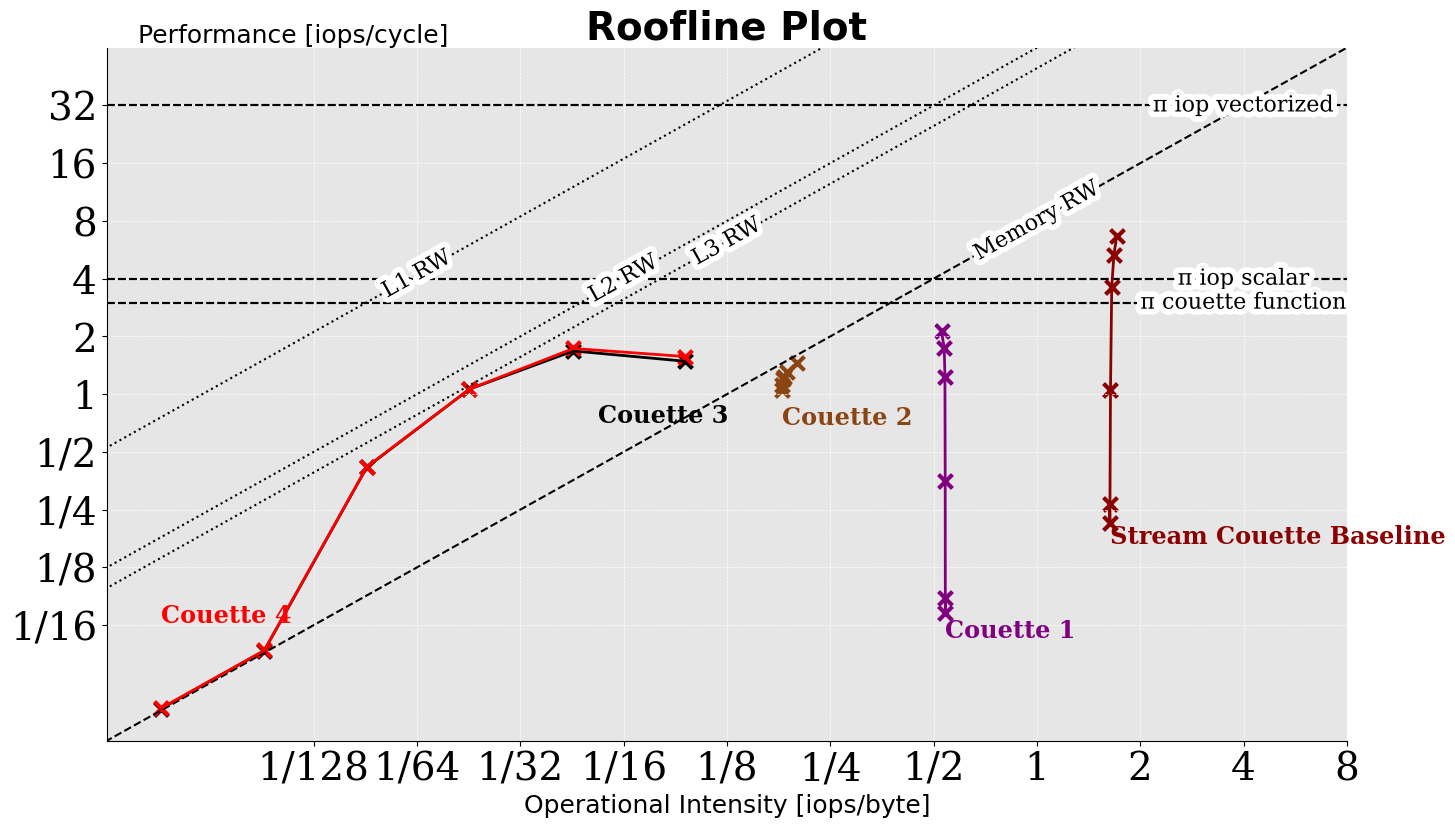

In [ ]:
savefile = "1roof_couette1234_new_color_bound_bold.pdf"
#op_types =   ["flop","iop","both"]
op_types =   ["iop"]
#byte_types = ["load","store","both"]
byte_types = ["both"]

fnames = ["Stream Couette Baseline" , "Couette 1", "Couette 2", "Couette 3", "Couette 4"]
# mycolors = ["brown","orange","black","brown","orange","black","brown","orange","black"]
mycolors = ["black","darkred","purple","saddlebrown","black","red","blue","blue"]

#df = "TimingData.csv"
#df = pd.read_csv(df)
#datafile = df[df['function'] == 'LBM Baseline']



# Save the filtered DataFrame to a new CSV file
#datafile.to_csv('filtered_TimingData.csv', index=False)
#datafile = 'filtered_TimingData.csv'
datafile = 'TimingData1.csv'
plot_zen3(27, fnames, op_types, byte_types, mycolors, savefile, datafile)

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib import rc
from labellines import labelLine, labelLines
import numpy as np
import pandas as pd
import matplotlib.patches as patches





darkgreen = (0.1,0.3,0.1,0.99)
# violet = # (0.2,0,0.3,0.99)



#rc('font',**{'family':'serif','serif':['Calibri']})
rc('text', usetex=False)
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Calibri']
plt.rcParams['figure.figsize'] = [16, 9]



xmax = 8
ymax = 64
xmin = 1/8
ymin = 1/64
x_ticks = [ 1/4, 1/2, 1, 2, 4, 8]
x_ticksL = ["1/4", "1/2", "1", "2", "4", "8"]
y_ticks = [1/16, 1/8, 1/4, 1/2, 1, 2, 4, 8, 16, 32]
y_ticksL = ["1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", "16", "32"]

# avx2 double, int
floats_per_vec = 4
ints_per_vec = 8


def get_data(ds, bc, L1, L2, L3, datafile):
    #csv_file_path = "TimingData.csv"
    csv_file_path = datafile
    df = pd.read_csv(csv_file_path, encoding='unicode_escape')
    df = df.loc[(df["function"]==bc)]
    df = df.loc[(df['DIRECTION_SIZE'] == ds)]
    nx = df["NX"].values
    iops = df["iops"].values
    flops = df["flops"].values
    ts = df["TIMESTEPS"].values
    cycles = df["cycles"].values

    bread = df["bytes_read"].values
    bwrite = df["bytes_write"].values

    bytes = bread + bwrite
    fOI = flops/bytes
    iOI = iops/bytes
    fOIr = flops/bread
    iOIr = iops/bread
    fOIw = flops/bwrite
    iOIw = iops/bwrite
    fP = ts*flops/cycles
    iP = ts*iops/cycles

    colors = np.where(bytes<L3, "chocolate", "orangered")
    colors = np.where(bytes<L2, "darkorange", colors)
    colors = np.where(bytes<L1, "orange", colors)

    return fOI,iOI,fOIr,iOIr,fOIw,iOIw,fP,iP,nx,colors



# def get_colors


    # Peak CPU performance (ops/cycle)
    # Peak CPU performance Vectorized (ops/cycle)
    # Performance: Flops/cycle = flops/byte * bytes/cycles corresponding to the given intensities
    # Operational intensities (flops/byte)

def roofline(
                peak_performance_flops,
                peak_performance_flops_fma,
                peak_performance_iops,
                L1_bw,
                L2_bw,
                L3_bw,
                mem_bw,
                fq,
                L1_s,
                L2_s,
                L3_s,
                dType,
                fnames,
                op_types,
                byte_types,
                savefile,
                mycols,
                datafile,
                zen=False
                ):
    ax  = plt.gca()
    fig = plt.gcf()




    plt.loglog()
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xticks(x_ticks, x_ticksL)
    plt.yticks(y_ticks, y_ticksL)
    plt.minorticks_off()
    plt.grid(True)

    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=28)

    plt.xlabel('Operational Intensity [flops + iops/byte]', loc='center', fontdict={'fontsize': 18, 'fontname': 'Helvetica', 'family': 'sans-serif'})
    plt.ylabel('Performance [flops + iops/cycle]', rotation=0, fontdict={'fontsize': 18, 'fontname': 'Helvetica', 'family': 'sans-serif'})
    ax.yaxis.set_label_coords(0.15, 1.0)
    #ax.xaxis.set_label_coords(0.8, -0.1)
    plt.title('Roofline Plot', fontdict={'fontsize':28, 'fontname': 'Helvetica', 'family': 'sans-serif'}, fontweight = 'bold') #, x=0.85, y=0.9)






    intensity = np.logspace(-5, 1, num=1000)

    peak_performance_flops_v = peak_performance_flops*floats_per_vec
    peak_performance_flops_v = peak_performance_flops*floats_per_vec
    peak_performance_flops_fma_v = peak_performance_flops_fma*floats_per_vec
    peak_performance_iops_v = peak_performance_iops*ints_per_vec



    # intel  amd slightly built different
    bw_performance_l1_read =  intensity * L1_bw[0]
    bw_performance_l1_write =  intensity * L1_bw[1]
    bw_performance_l2_rw =  intensity * (L2_bw)
    bw_performance_l3 =  intensity * L3_bw[0]
    bw_performance_mem = intensity * mem_bw




    #ax.axhline(y=peak_performance_flops,        color=darkgreen, linestyle='--', label='π flop scalar')
    #ax.axhline(y=peak_performance_flops_v,      color=darkgreen, linestyle='--', label='π flop vectorized')
    ax.axhline(y=peak_performance_flops_fma,    color="black", linestyle='--', label='π flop w.fma scalar')
    ax.axhline(y=peak_performance_flops_fma_v,  color="black", linestyle='--', label='π flop w. fma vectorized')
    #ax.axhline(y=peak_performance_iops,         color=darkgreen, linestyle='--', label='π iop scalar')
    ax.axhline(y=peak_performance_iops_v,       color="black", linestyle='--', label='π iop vectorized')
    ax.axhline(8.7,       color="black", linestyle='--', label='π momentum function')

    i = 0

    lines = ax.get_lines()
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    #labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    #labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1


    if(zen):
        ax.plot(intensity, bw_performance_l1_read + bw_performance_l1_write,  label="L1 RW" , color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/6, align=True, fontsize=10, yoffset=0.0) ;    i+=1
        ax.plot(intensity, bw_performance_l2_rw,    label="L2 RW", color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/2, align=True, fontsize=16, yoffset=0.0)  ;   i+=1
        ax.plot(intensity, bw_performance_l3,    label="L3 RW", color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/3, align=True, fontsize=16, yoffset=0.0)  ;   i+=1

    else:
        ax.plot(intensity, bw_performance_l1_read,  label="bound based on \n L1 read bandwith" , color ="navy", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l1_write, label="bound based on \n L1 write bandwith", color ="navy", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l2_rw,    label="bound based on \n L2 read+write bandwith", color ="indigo", linestyle=(0, (5, 10)))
        lines = ax.get_lines();  labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l3,       label="bound based on \n L3 read bw, write bw", color ="purple", linestyle=(0, (5, 10)))
        lines = ax.get_lines();  labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0);    i+=1

    ax.plot(intensity, bw_performance_mem,      label="Memory RW", color ="black", linestyle='--')
    lines = ax.get_lines();  labelLine(lines[i], 1/3, align=True, fontsize=16, yoffset=0.0);    i+=1
    ax.grid(True, color='white', linestyle='--', linewidth=0.5)
    ax.set_facecolor((0.9,0.9,0.9))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # navy burlywood, indigo darkorange, chocolate purple, darkviolet orangered






    # labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1

    def CPLOT(op, bt):
        return (op in op_types) and (bt in byte_types)

    # +XxoO
    shift = [0, 0, 0, 0, 8, 6]
    shift1 = [0, 0, 0, 0, 0, 0]
    idx = [0, 1, 1, 5, 1]
    i = 0
    x = -3
    for fname in fnames:
        fOI,iOI,fOIr,iOIr,fOIw,iOIw,fP,iP, nx, colors = get_data(dType, fname, L1_s, L2_s, L3_s, datafile)
        i += 1
        x += 2


        if CPLOT("flop", "both"):
            ax.plot(fOI, fP, lw=2, color=mycols[i])
            ax.scatter(fOI, fP, marker='x', s=100, lw=3, color=mycols[i])
            ax.text( fOI[-1]+ shift1[i], 5/8*fP[-1]+ shift[i],  s=fname, fontsize="xx-large", color=mycols[i], fontweight = "bold")



        #if CPLOT("flop", "both"):
           # ax.plot(fOI, fP, lw=2, color=mycols[i])
            #ax.scatter(fOI, fP, marker='x', s=100, lw=3, color=colors)
            #ax.text( fOI[-1]+ shift1[i], 5/8*fP[-1]+ shift[i],  s=fname+"\n flops/c,load+write", fontsize="xx-large", color=mycols[i], fontweight = "bold")
        if CPLOT("iop", "both"):
            ax.plot(iOI, iP, lw=1, color=mycols[i])
            ax.scatter(iOI, iP, marker='x', s=25, lw=2, color=colors)
            ax.text( iOI[-1], 5/8*iP[-1]+ shift[i],  s=fname+"\n iops/c,load+write", fontsize="xx-large", color=mycols[i])
        #if CPLOT("both", "both"):
            #ax.plot(iOI+fOI, iP+fP, lw=2, color=mycols[i])
            #ax.scatter(iOI+fOI, iP+fP, marker='x', s=100, lw=3, color=colors)
            #ax.text(  (iOI+fOI)[-1] + shift1[i], 5/8*(iP+fP)[-1] + shift[i],  s=fname+"\n ops/c,load+write", fontsize="xx-large", color=mycols[i], fontweight = "bold")


        if CPLOT("both", "both"):
            ax.plot(iOI+fOI, iP+fP, lw=2, color=mycols[i])
            ax.scatter(iOI+fOI, iP+fP, marker='x', s=100, lw=3, color=mycols[i])
            ax.text(  (iOI+fOI)[-1] + shift1[i], 5/8*(iP+fP)[-1] + shift[i],  s=fname, fontsize="xx-large", color=mycols[i], fontweight = "bold")
            #x = 1
        if CPLOT("flop", "load"):
            ax.plot(fOIr, fP, lw=2, color=mycols[3])
            ax.scatter(fOIr, fP, marker='x', s=25, lw=2, color=colors)
            ax.text(fOIr[-1], 5/8*fP[-1],  s=fname+"\n flops/c,load", fontsize="small", color=mycols[3])
        if CPLOT("iop", "load"):
            ax.plot(iOIr, iP, lw=1, color=mycols[4])
            ax.scatter(iOIr, iP, marker='x', s=25, lw=2, color=colors)
            ax.text(iOIr[-1], 5/8*iP[-1],  s=fname+"\n ilops/c,load", fontsize="small", color=mycols[4])
        if CPLOT("both", "load"):
            ax.plot(iOIr+fOIr, iP+fP, lw=1, color=mycols[5])
            ax.scatter(iOIr+fOIr,iP+fP, marker='x', s=25, lw=2, color=colors)
            ax.text((iOIr+fOIr)[-1], 5/8*(iP+fP)[-1],  s=fname+"\n ops/c,load", fontsize="small", color=mycols[5])
        if CPLOT("flop", "store"):
            ax.plot(fOIw, fP, lw=1, color=mycols[6])
            ax.scatter(fOIw, fP, marker='x', s=25, lw=2, color=colors)
            ax.text(fOIw[-1], 5/8*fP[-1],  s=fname+"\n flops/c,write", fontsize="small", color=mycols[6])
        if CPLOT("iop", "store"):
            ax.plot(iOIw, iP, lw=1, color=mycols[7])
            ax.scatter(iOIw, iP, marker='x', s=25, lw=2, color=colors)
            ax.text(iOIw[-1], 5/8*iP[-1],  s=fname+"\n ilops/c,write", fontsize="small", color=mycols[7])
        if CPLOT("both", "store"):
            ax.plot(iOIw+fOIw, iP+fP, lw=1, color=mycols[8])
            ax.scatter(iOIw+fOIw, iP+fP, marker='x', s=25, lw=2, color=colors)
            ax.text((iOIw+iOIw)[-1], 5/8*(iP+fP)[-1],  s=fname+"\n ops/c,write", fontsize="small", color=mycols[8])





    if(savefile):
        fig.savefig(savefile, dpi=100)
    plt.show()






def plot_kaby(dType,fnames, op_types, byte_types, mycols, sf, datafile):
        roofline(
                    peak_performance_flops=2,
                    peak_performance_flops_fma= 4,
                    peak_performance_iops=4,
                    L1_bw=(64,32),
                    L2_bw=64,
                    L3_bw=(32,32),
                    mem_bw=16,
                    fq=2.7,
                    L1_s=2**15,
                    L2_s=2**18,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile
                )




def plot_coffee(dType,fnames, op_types, byte_types, mycols, sf, datafile):

    roofline(
                    peak_performance_flops=2,
                    peak_performance_flops_fma= 4,
                    peak_performance_iops=4,
                    L1_bw=(64,32),
                    L2_bw=64,
                    L3_bw=(32,32),
                    mem_bw=16,
                    fq=2.3,
                    L1_s=2**15,
                    L2_s=2**18,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile
                )




def plot_zen3(dType,fnames, op_types, byte_types, mycols, sf,datafile):
    # 51.8gb/s -> 70?? DDR LRDDR??
    # memoryBW1 = 51.8*2**30 #B/s
    # freq = 2.7*10**9 # cycles/s
    # mm_bw = memoryBW1/freq # B/cycle = (B/s)/(cycle/s)
    # 20.6

    roofline(
                    peak_performance_flops=4,
                    peak_performance_flops_fma= 6,
                    peak_performance_iops=4,
                    #L1_bw=(32,32),
                    L1_bw = (135, 135),
                    L2_bw=64,#(32,32),
                    #L3_bw=(32,32),
                    L3_bw=(50,50),
                    #mem_bw=20.6,
                    mem_bw=8,
                    fq=2.5,
                    #L1_s=2**19,
                    L1_s=2**15,
                    #L2_s=2**22,
                    L2_s=2**19,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile,
                    zen = True
                )

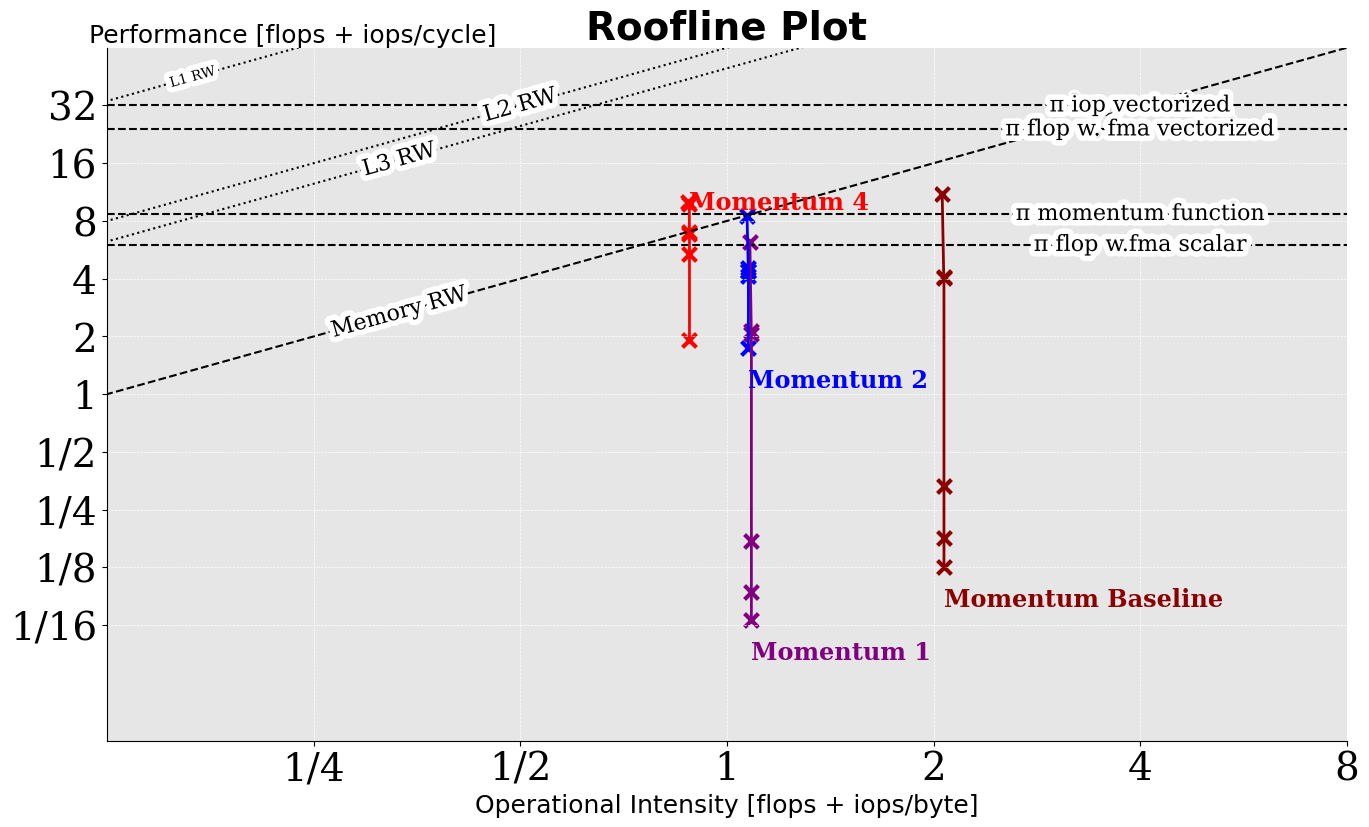

In [ ]:
savefile = "roof_momentum124_new_color1_bound_bold.pdf"
#op_types =   ["flop","iop","both"]
op_types =   ["both"]
#byte_types = ["load","store","both"]
byte_types = ["both"]

fnames = ["Momentum Baseline" ,"Momentum 1", "Momentum 2", "Momentum 4"]
# mycolors = ["brown","orange","black","brown","orange","black","brown","orange","black"]
mycolors = ["black","darkred","purple","blue","red","blue","blue","blue"]

#df = "TimingData.csv"
#df = pd.read_csv(df)
#datafile = df[df['function'] == 'LBM Baseline']



# Save the filtered DataFrame to a new CSV file
#datafile.to_csv('filtered_TimingData.csv', index=False)
#datafile = 'filtered_TimingData.csv'
datafile = 'TimingData1.csv'
plot_zen3(27, fnames, op_types, byte_types, mycolors, savefile, datafile)

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
from matplotlib import rc
from labellines import labelLine, labelLines
import numpy as np
import pandas as pd
import matplotlib.patches as patches





darkgreen = (0.1,0.3,0.1,0.99)
# violet = # (0.2,0,0.3,0.99)



#rc('font',**{'family':'serif','serif':['Calibri']})
rc('text', usetex=False)
plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Calibri']
plt.rcParams['figure.figsize'] = [16, 9]



xmax = 8
ymax = 64
xmin = 1/8
ymin = 1/64
x_ticks = [ 1/4, 1/2, 1, 2, 4, 8]
x_ticksL = ["1/4", "1/2", "1", "2", "4", "8"]
y_ticks = [1/16, 1/8, 1/4, 1/2, 1, 2, 4, 8, 16, 32]
y_ticksL = ["1/16", "1/8", "1/4", "1/2", "1", "2", "4", "8", "16", "32"]

# avx2 double, int
floats_per_vec = 4
ints_per_vec = 8


def get_data(ds, bc, L1, L2, L3, datafile):
    #csv_file_path = "TimingData.csv"
    csv_file_path = datafile
    df = pd.read_csv(csv_file_path, encoding='unicode_escape')
    df = df.loc[(df["function"]==bc)]
    df = df.loc[(df['DIRECTION_SIZE'] == ds)]
    nx = df["NX"].values
    iops = df["iops"].values
    flops = df["flops"].values
    ts = df["TIMESTEPS"].values
    cycles = df["cycles"].values

    bread = df["bytes_read"].values
    bwrite = df["bytes_write"].values

    bytes = bread + bwrite
    fOI = flops/bytes
    iOI = iops/bytes
    fOIr = flops/bread
    iOIr = iops/bread
    fOIw = flops/bwrite
    iOIw = iops/bwrite
    fP = ts*flops/cycles
    iP = ts*iops/cycles

    colors = np.where(bytes<L3, "chocolate", "orangered")
    colors = np.where(bytes<L2, "darkorange", colors)
    colors = np.where(bytes<L1, "orange", colors)

    return fOI,iOI,fOIr,iOIr,fOIw,iOIw,fP,iP,nx,colors



# def get_colors


    # Peak CPU performance (ops/cycle)
    # Peak CPU performance Vectorized (ops/cycle)
    # Performance: Flops/cycle = flops/byte * bytes/cycles corresponding to the given intensities
    # Operational intensities (flops/byte)

def roofline(
                peak_performance_flops,
                peak_performance_flops_fma,
                peak_performance_iops,
                L1_bw,
                L2_bw,
                L3_bw,
                mem_bw,
                fq,
                L1_s,
                L2_s,
                L3_s,
                dType,
                fnames,
                op_types,
                byte_types,
                savefile,
                mycols,
                datafile,
                zen=False
                ):
    ax  = plt.gca()
    fig = plt.gcf()




    plt.loglog()
    plt.axis([xmin,xmax,ymin,ymax])
    plt.xticks(x_ticks, x_ticksL)
    plt.yticks(y_ticks, y_ticksL)
    plt.minorticks_off()
    plt.grid(True)

    plt.tick_params(axis='x', which='major', labelsize=28)
    plt.tick_params(axis='y', which='major', labelsize=28)

    plt.xlabel('Operational Intensity [flops/byte]', loc='center', fontdict={'fontsize': 18, 'fontname': 'Helvetica', 'family': 'sans-serif'})
    plt.ylabel('Performance [flops/cycle]', rotation=0, fontdict={'fontsize': 18, 'fontname': 'Helvetica', 'family': 'sans-serif'})
    ax.yaxis.set_label_coords(0.15, 1.0)
    #ax.xaxis.set_label_coords(0.8, -0.1)
    plt.title('Roofline Plot', fontdict={'fontsize':28, 'fontname': 'Helvetica', 'family': 'sans-serif'}, fontweight = "bold") #, x=0.85, y=0.9)






    intensity = np.logspace(-5, 1, num=1000)

    peak_performance_flops_v = peak_performance_flops*floats_per_vec
    peak_performance_flops_v = peak_performance_flops*floats_per_vec
    peak_performance_flops_fma_v = peak_performance_flops_fma*floats_per_vec
    peak_performance_iops_v = peak_performance_iops*ints_per_vec



    # intel  amd slightly built different
    bw_performance_l1_read =  intensity * L1_bw[0]
    bw_performance_l1_write =  intensity * L1_bw[1]
    bw_performance_l2_rw =  intensity * (L2_bw)
    bw_performance_l3 =  intensity * L3_bw[0]
    bw_performance_mem = intensity * mem_bw




    #ax.axhline(y=peak_performance_flops,        color=darkgreen, linestyle='--', label='π flop scalar')
    #ax.axhline(y=peak_performance_flops_v,      color=darkgreen, linestyle='--', label='π flop vectorized')
    ax.axhline(y=peak_performance_flops_fma,    color="black", linestyle='--', label='π flop w.fma scalar')
    ax.axhline(y=peak_performance_flops_fma_v,  color="black", linestyle='--', label='π flop w. fma vectorized')
    #ax.axhline(y=peak_performance_iops,         color=darkgreen, linestyle='--', label='π iop scalar')
    #ax.axhline(y=peak_performance_iops_v,       color="black", linestyle='--', label='π iop vectorized')
    ax.axhline(13.3,       color="black", linestyle='--', label='π collision function')

    i = 0

    lines = ax.get_lines()
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    #labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    #labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1
    #labelLine(lines[i], 4, align=True, fontsize=16, yoffset=0.0);    i+=1


    if(zen):
        ax.plot(intensity, bw_performance_l1_read + bw_performance_l1_write,  label="L1 RW" , color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/6, align=True, fontsize=10, yoffset=0.0) ;    i+=1
        ax.plot(intensity, bw_performance_l2_rw,    label="L2 RW", color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/2, align=True, fontsize=16, yoffset=0.0)  ;   i+=1
        ax.plot(intensity, bw_performance_l3,    label="L3 RW", color ="black", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/3, align=True, fontsize=16, yoffset=0.0)  ;   i+=1

    else:
        ax.plot(intensity, bw_performance_l1_read,  label="bound based on \n L1 read bandwith" , color ="navy", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l1_write, label="bound based on \n L1 write bandwith", color ="navy", linestyle=':')
        lines = ax.get_lines();  labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l2_rw,    label="bound based on \n L2 read+write bandwith", color ="indigo", linestyle=(0, (5, 10)))
        lines = ax.get_lines();  labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0);    i+=1
        ax.plot(intensity, bw_performance_l3,       label="bound based on \n L3 read bw, write bw", color ="purple", linestyle=(0, (5, 10)))
        lines = ax.get_lines();  labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0);    i+=1

    ax.plot(intensity, bw_performance_mem,      label="Memory RW", color ="black", linestyle='--')
    lines = ax.get_lines();  labelLine(lines[i], 1/3, align=True, fontsize=16, yoffset=0.0);    i+=1
    ax.grid(True, color='white', linestyle='--', linewidth=0.5)
    ax.set_facecolor((0.9,0.9,0.9))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # navy burlywood, indigo darkorange, chocolate purple, darkviolet orangered






    # labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/40, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1
    # labelLine(lines[i], 1/16, align=True, fontsize=9, yoffset=0.0)
    # i+=1

    def CPLOT(op, bt):
        return (op in op_types) and (bt in byte_types)

    # +XxoO
    shift = [0, 0, 0, 0, 5, 6]
    shift1 = [0, 0, 0, 0, 0, 0]
    idx = [0, 1, 1, 5, 1]
    i = 0
    x = -3
    for fname in fnames:
        fOI,iOI,fOIr,iOIr,fOIw,iOIw,fP,iP, nx, colors = get_data(dType, fname, L1_s, L2_s, L3_s, datafile)
        i += 1
        x += 2


        if CPLOT("flop", "both"):
            ax.plot(fOI, fP, lw=2, color=mycols[i])
            ax.scatter(fOI, fP, marker='x', s=100, lw=3, color=mycols[i])
            ax.text( fOI[-1]+ shift1[i], 5/8*fP[-1]+ shift[i],  s=fname, fontsize="xx-large", color=mycols[i], fontweight = "bold")



        #if CPLOT("flop", "both"):
           # ax.plot(fOI, fP, lw=2, color=mycols[i])
            #ax.scatter(fOI, fP, marker='x', s=100, lw=3, color=colors)
            #ax.text( fOI[-1]+ shift1[i], 5/8*fP[-1]+ shift[i],  s=fname+"\n flops/c,load+write", fontsize="xx-large", color=mycols[i], fontweight = "bold")
        if CPLOT("iop", "both"):
            ax.plot(iOI, iP, lw=1, color=mycols[i])
            ax.scatter(iOI, iP, marker='x', s=25, lw=2, color=colors)
            ax.text( iOI[-1], 5/8*iP[-1]+ shift[i],  s=fname+"\n iops/c,load+write", fontsize="xx-large", color=mycols[i])
        #if CPLOT("both", "both"):
            #ax.plot(iOI+fOI, iP+fP, lw=2, color=mycols[i])
            #ax.scatter(iOI+fOI, iP+fP, marker='x', s=100, lw=3, color=colors)
            #ax.text(  (iOI+fOI)[-1] + shift1[i], 5/8*(iP+fP)[-1] + shift[i],  s=fname+"\n ops/c,load+write", fontsize="xx-large", color=mycols[i], fontweight = "bold")


        if CPLOT("both", "both"):
            ax.plot(iOI+fOI, iP+fP, lw=2, color=mycols[i])
            ax.scatter(iOI+fOI, iP+fP, marker='x', s=100, lw=3, color=mycols[i])
            ax.text(  (iOI+fOI)[-1] + shift1[i], 5/8*(iP+fP)[-1] + shift[i],  s=fname, fontsize="xx-large", color=mycols[i], fontweight = "bold")
            #x = 1
        if CPLOT("flop", "load"):
            ax.plot(fOIr, fP, lw=2, color=mycols[3])
            ax.scatter(fOIr, fP, marker='x', s=25, lw=2, color=colors)
            ax.text(fOIr[-1], 5/8*fP[-1],  s=fname+"\n flops/c,load", fontsize="small", color=mycols[3])
        if CPLOT("iop", "load"):
            ax.plot(iOIr, iP, lw=1, color=mycols[4])
            ax.scatter(iOIr, iP, marker='x', s=25, lw=2, color=colors)
            ax.text(iOIr[-1], 5/8*iP[-1],  s=fname+"\n ilops/c,load", fontsize="small", color=mycols[4])
        if CPLOT("both", "load"):
            ax.plot(iOIr+fOIr, iP+fP, lw=1, color=mycols[5])
            ax.scatter(iOIr+fOIr,iP+fP, marker='x', s=25, lw=2, color=colors)
            ax.text((iOIr+fOIr)[-1], 5/8*(iP+fP)[-1],  s=fname+"\n ops/c,load", fontsize="small", color=mycols[5])
        if CPLOT("flop", "store"):
            ax.plot(fOIw, fP, lw=1, color=mycols[6])
            ax.scatter(fOIw, fP, marker='x', s=25, lw=2, color=colors)
            ax.text(fOIw[-1], 5/8*fP[-1],  s=fname+"\n flops/c,write", fontsize="small", color=mycols[6])
        if CPLOT("iop", "store"):
            ax.plot(iOIw, iP, lw=1, color=mycols[7])
            ax.scatter(iOIw, iP, marker='x', s=25, lw=2, color=colors)
            ax.text(iOIw[-1], 5/8*iP[-1],  s=fname+"\n ilops/c,write", fontsize="small", color=mycols[7])
        if CPLOT("both", "store"):
            ax.plot(iOIw+fOIw, iP+fP, lw=1, color=mycols[8])
            ax.scatter(iOIw+fOIw, iP+fP, marker='x', s=25, lw=2, color=colors)
            ax.text((iOIw+iOIw)[-1], 5/8*(iP+fP)[-1],  s=fname+"\n ops/c,write", fontsize="small", color=mycols[8])





    if(savefile):
        fig.savefig(savefile, dpi=100)
    plt.show()






def plot_kaby(dType,fnames, op_types, byte_types, mycols, sf, datafile):
        roofline(
                    peak_performance_flops=2,
                    peak_performance_flops_fma= 4,
                    peak_performance_iops=4,
                    L1_bw=(64,32),
                    L2_bw=64,
                    L3_bw=(32,32),
                    mem_bw=16,
                    fq=2.7,
                    L1_s=2**15,
                    L2_s=2**18,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile
                )




def plot_coffee(dType,fnames, op_types, byte_types, mycols, sf, datafile):

    roofline(
                    peak_performance_flops=2,
                    peak_performance_flops_fma= 4,
                    peak_performance_iops=4,
                    L1_bw=(64,32),
                    L2_bw=64,
                    L3_bw=(32,32),
                    mem_bw=16,
                    fq=2.3,
                    L1_s=2**15,
                    L2_s=2**18,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile
                )




def plot_zen3(dType,fnames, op_types, byte_types, mycols, sf,datafile):
    # 51.8gb/s -> 70?? DDR LRDDR??
    # memoryBW1 = 51.8*2**30 #B/s
    # freq = 2.7*10**9 # cycles/s
    # mm_bw = memoryBW1/freq # B/cycle = (B/s)/(cycle/s)
    # 20.6

    roofline(
                    peak_performance_flops=4,
                    peak_performance_flops_fma= 6,
                    peak_performance_iops=4,
                    #L1_bw=(32,32),
                    L1_bw = (135, 135),
                    L2_bw=64,#(32,32),
                    #L3_bw=(32,32),
                    L3_bw=(50,50),
                    #mem_bw=20.6,
                    mem_bw=8,
                    fq=2.5,
                    #L1_s=2**19,
                    L1_s=2**15,
                    #L2_s=2**22,
                    L2_s=2**19,
                    L3_s=2**24,
                    dType=dType,
                    fnames=fnames,
                    op_types=op_types,
                    byte_types=byte_types,
                    savefile = sf,
                    mycols=mycols,
                    datafile=datafile,
                    zen = True
                )

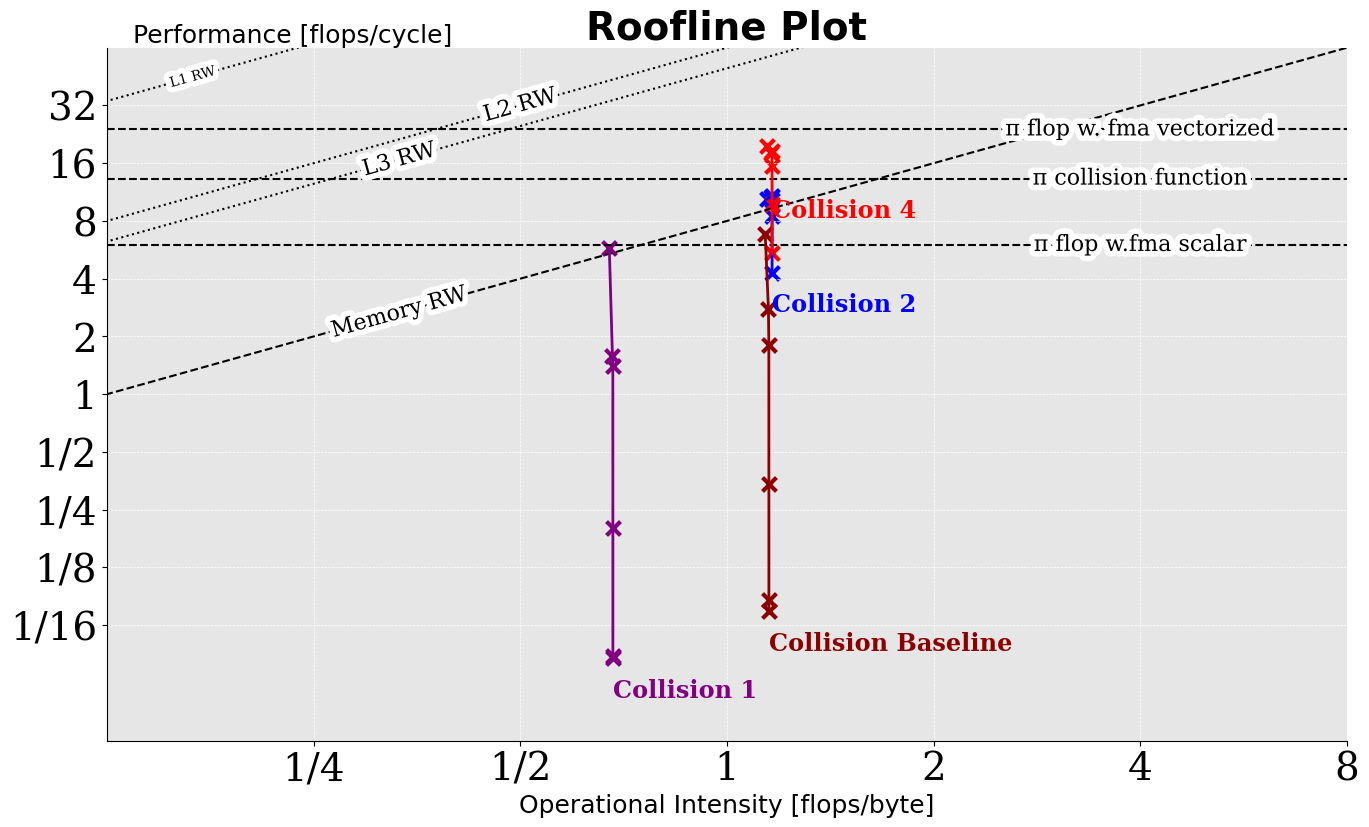

In [ ]:
savefile = "roof_collision124flop_new_color_bound_bold.pdf"
#op_types =   ["flop","iop","both"]
op_types =   ["flop"]
#byte_types = ["load","store","both"]
byte_types = ["both"]

fnames = ["Collision Baseline" ,"Collision 1", "Collision 2" , "Collision 4"]
# mycolors = ["brown","orange","black","brown","orange","black","brown","orange","black"]
mycolors = ["black","darkred","purple","blue","red","blue","blue","blue"]




# Save the filtered DataFrame to a new CSV file
#datafile.to_csv('filtered_TimingData.csv', index=False)
#datafile = 'filtered_TimingData.csv'
datafile = 'TimingData1.csv'

plot_zen3(27, fnames, op_types, byte_types, mycolors, savefile, datafile)